# <font color='red'> İzlenecek adımlar

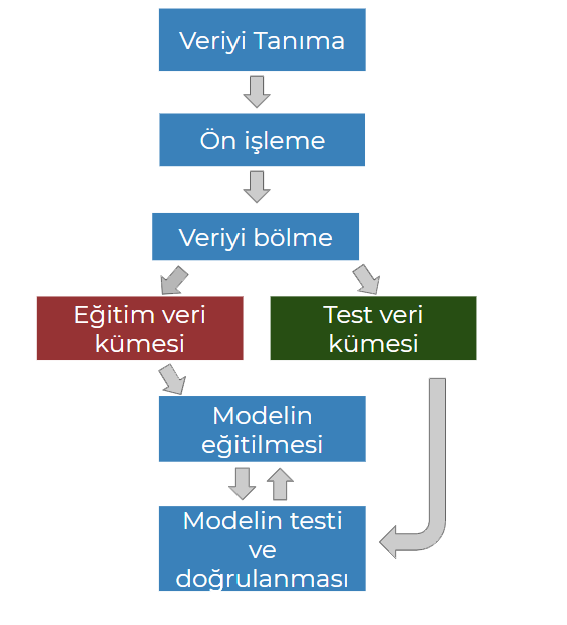

**Bu bir sınıflandırma problemidir.**

**farklı Makine Öğrenimi Algoritmalarını kullanarak bir Mobil Fiyat Tahmini uyguladık. Bu proje, telefonların fiyat fiyat aralığını sınıflandıracaktır. 0-3 arası fiyat değişmektedir.**

# <font color='blue'> VERİYİ TANIMA VE GÖRSELLEŞTİRME

**Kütüphaneleri import ettik.**

In [136]:
import pandas as pd;
import numpy as np;
import seaborn as sbn;
import matplotlib.pylab as plt
%matplotlib inline


In [137]:
data = pd.read_csv('data.csv')


**train_data'nın satır ve sutun sayısını görüntüledik.**

In [138]:
data.shape # eğitim veri setimizde 2000 satır 21 özellik sütun vardır

(2000, 21)

In [139]:
data.columns # eğitim veri kümesi 2000 satır ve 21 sutün

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Sutunların isimlerini türkçe yaptık.**

In [140]:
data.columns =["pil_gücü","bluetooth","ghz","cift_sim","önkamera_mgp","4G","dahili_bellek","mobil_derinlik","ağırlık",
                     "çekirdek_sayısı","kamera_mgp","pç_yükseklik","pç_genişlik","RAM","ekran_yükseklik","ekran_genişlik",
                     "max_şarjsüresi","3G","dokunmatik_ekran","wifi", "fiyat_aralığı" ];

**eğitim verisinin ilk 5 satırı**

In [141]:
data.head()

,pil_gücü,bluetooth,ghz,cift_sim,önkamera_mgp,4G,dahili_bellek,mobil_derinlik,ağırlık,çekirdek_sayısı,...,pç_yükseklik,pç_genişlik,RAM,ekran_yükseklik,ekran_genişlik,max_şarjsüresi,3G,dokunmatik_ekran,wifi,fiyat_aralığı
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [142]:
# battery_power =>Pil Gücü (mAh)
# blue => BlueTooth'a sahip olup olmadığı
# clock_speed => GHz :Mikroişlemci saat hızı
# dual_sim => Telefonun çift sim desteği var mı yok mu?
# fc => Ön Kamera Megapikselleri
# four_g => 4G desteği var mı yok mu
# int_memory => GigaByte cinsinden Dahili Bellek
# m_dep => Cm cinsinden Mobil Derinlik 
# mobile_wt => Cep Telefonunun Ağırlığı
# n_cores => İşlemcideki çekirdek sayısı
# pc => Birincil Kamera Megapikselleri
# px_height => Piksel Çözünürlük yüksekliği
# px_width => Piksel çözünürlük genişliği
# Ram => MB cinsinden RAM
# sc_h => Cm cinsinden mobil ekran yüksekliği
# sc_w => Cm cinsinden mobil ekran genişliği
# talk_time => Tek bir şarjdan sonra en uzun süre
# three_g => 3g veya değil
# touch_screen => Dokunmatik ekranı var ya da yok
# wifi => Wifi var mı yok mu
# price_range => fiyat_aralığı : 0(düşük maliyet), 1(orta maliyet), 2(yüksek maliyet) ve 3(çok yüksek maliyet) değerlerine sahip hedef değişkendir.


In [143]:
data = data[data['ekran_genişlik'] != 0]
data.shape
# 180 satır eksik veri içeriyor onları kaldırdık.

(1820, 21)

# <font color='red'> Sınıflar

**hedef özelliğimiz olan “fiyat aralığı”nı ekrana getirdik ve grafikte de görebileceğiniz gibi 0, 1, 2 ve 3'ün hepsinde 500 satır var. Bu, dengesiz bir veri kümesi olmadığı anlamına gelir.**



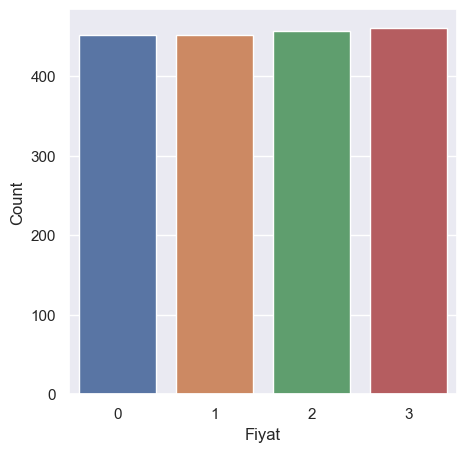

In [144]:
sbn.set()
sbn.countplot(x='fiyat_aralığı', data=data)
plt.xlabel('Fiyat')
plt.ylabel('Count')
plt.show()

<AxesSubplot: >

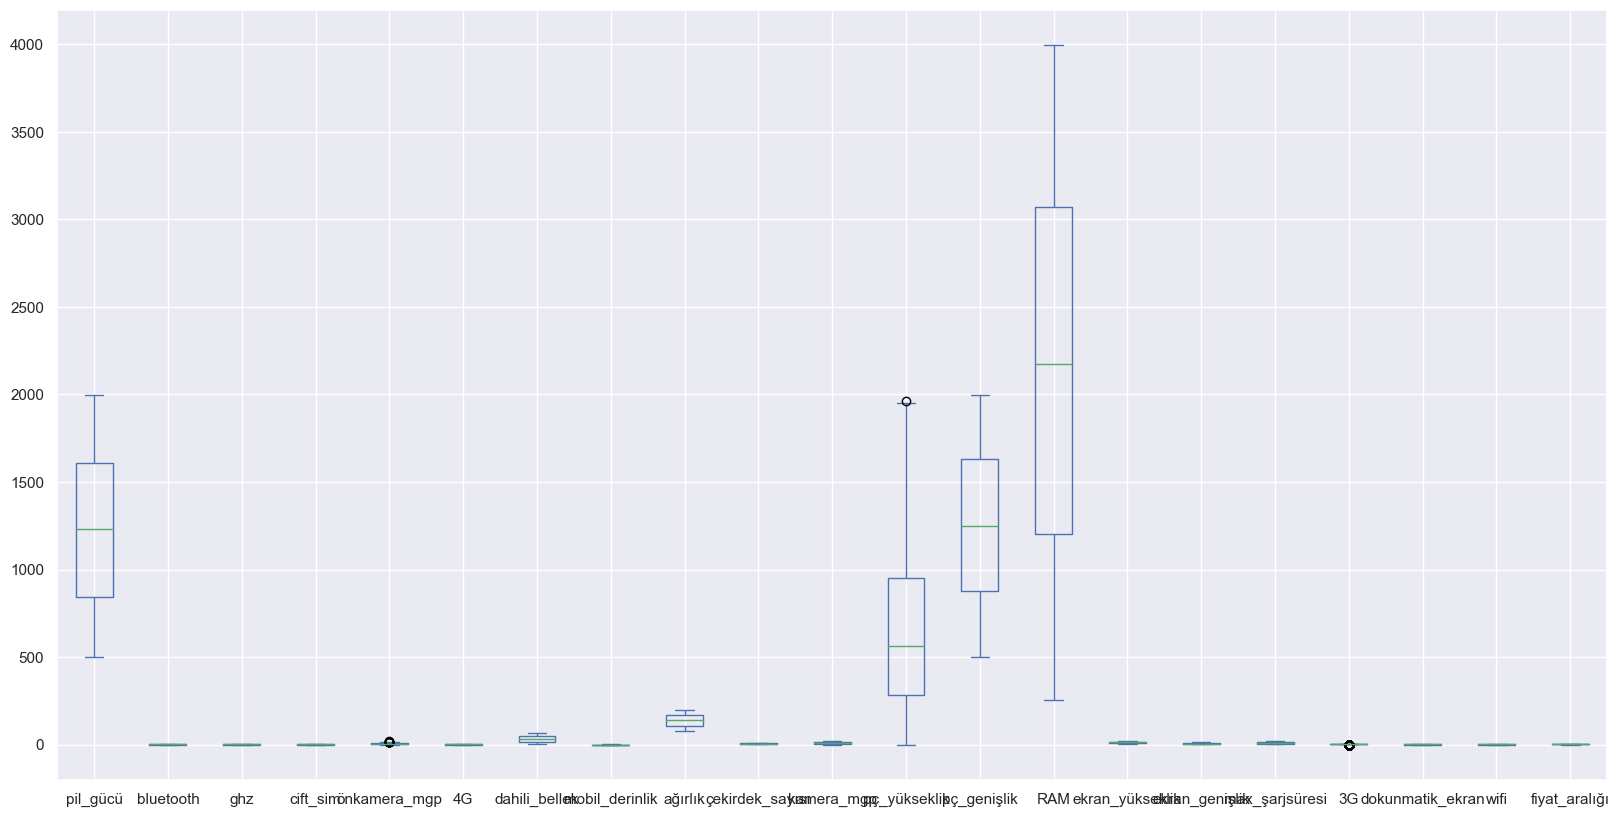

In [145]:
data.plot(kind='box',figsize=(20,10))

# <font color='red'>Data Distribution   (veri dağıtımı)

**Bazı veri özelliklerini analiz edip ve dağılımlarını görüntüledik**

**İlk olarak pil mAh'ının nasıl dağıldığına bakıyoruz.**

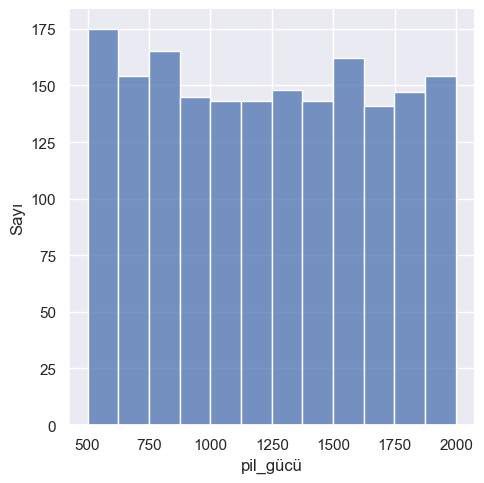

In [146]:
sbn.set(rc={'figure.figsize':(5,5)})
ax=sbn.displot(data=data["pil_gücü"])
plt.ylabel('Sayı')
plt.show()

**Şimdi, kaç cihazın Bluetooth'a sahip olduğunu ve kaç tanesinin olmadığını görüyoruz**

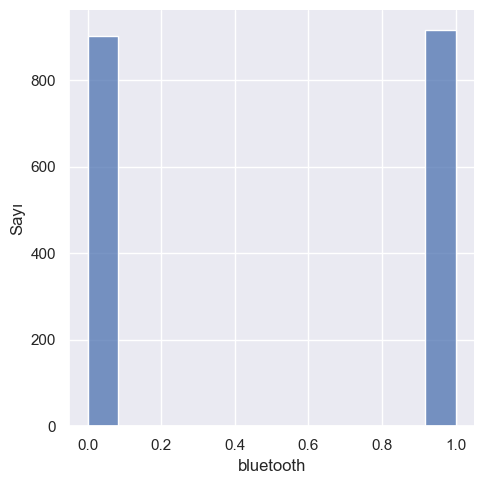

In [147]:
sbn.set(rc={'figure.figsize':(5,5)})
ax=sbn.displot(data=data["bluetooth"])
plt.ylabel('Sayı')
plt.show()

**Böylece, cihazların yarısında Bluetooth olduğunu ve yarısında olmadığını görebiliriz.**

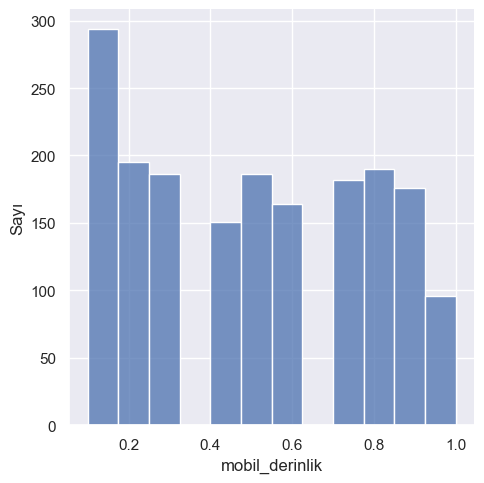

In [148]:
# mobil_derinliği(cm cinsinden) analiz ettik.
sbn.set(rc={'figure.figsize':(5,5)})
ax=sbn.displot(data=data["mobil_derinlik"])
plt.ylabel('Sayı')
plt.show()

**Birkaç cep telefonu çok ince ve birkaçı neredeyse bir cm kalınlığında.**

**Benzer şekilde, veri dağılımı tüm veri özellikleri için analiz edilebilir.**

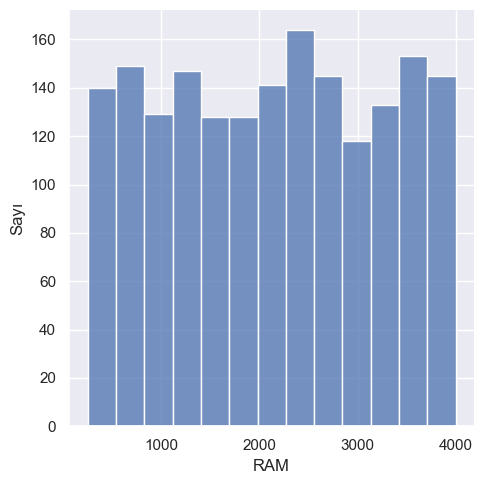

In [149]:
# ram için analizde bulunduk.
# en çok 2000-3000 RAM aralığında telefon bulunuyor. 
sbn.set(rc={'figure.figsize':(5,5)})
ax=sbn.displot(data=data["RAM"])
plt.ylabel('Sayı')
plt.show()

# <font color='red'>Veriyi describe etme

In [150]:
# Veri Setindeki verilerin açıklamasını döndürür. Boş olmayan değerlerin sayısı, 
# Ortalama değer, Standart sapma, Max-Min değerleri gibi.
data.describe()

,pil_gücü,bluetooth,ghz,cift_sim,önkamera_mgp,4G,dahili_bellek,mobil_derinlik,ağırlık,çekirdek_sayısı,...,pç_yükseklik,pç_genişlik,RAM,ekran_yükseklik,ekran_genişlik,max_şarjsüresi,3G,dokunmatik_ekran,wifi,fiyat_aralığı
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,...,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1237.843956,0.503846,1.519670,0.504396,4.319231,0.524725,32.139560,0.499890,140.585714,4.532967,...,646.731319,1252.686264,2133.372527,12.485714,6.337363,11.007143,0.760989,0.507692,0.513187,1.509341
std,439.940961,0.500123,0.813829,0.500118,4.354894,0.499526,18.114542,0.288805,35.428886,2.289520,...,444.877537,432.342583,1087.197536,4.166849,4.152062,5.455951,0.426597,0.500078,0.499963,1.119285
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.750000,877.000000,1203.750000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.500000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.500000,5.000000,...,561.500000,1250.000000,2174.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,...,952.000000,1633.000000,3072.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# <font color='red'>Verilerin özetlenmiş bilgilerinin gözlemlenmesi

In [151]:
#veri kümesindeki verilerin türleri.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pil_gücü          1820 non-null   int64  
 1   bluetooth         1820 non-null   int64  
 2   ghz               1820 non-null   float64
 3   cift_sim          1820 non-null   int64  
 4   önkamera_mgp      1820 non-null   int64  
 5   4G                1820 non-null   int64  
 6   dahili_bellek     1820 non-null   int64  
 7   mobil_derinlik    1820 non-null   float64
 8   ağırlık           1820 non-null   int64  
 9   çekirdek_sayısı   1820 non-null   int64  
 10  kamera_mgp        1820 non-null   int64  
 11  pç_yükseklik      1820 non-null   int64  
 12  pç_genişlik       1820 non-null   int64  
 13  RAM               1820 non-null   int64  
 14  ekran_yükseklik   1820 non-null   int64  
 15  ekran_genişlik    1820 non-null   int64  
 16  max_şarjsüresi    1820 non-null   int64  


# <font color='blue'> VERİYİ ÖN İŞLEME

# <font color='red'>Nan deger kontrolu

**Eğitim veri setinin boş değerler içerdiğini veya isnull() ve sum() yöntemini kullanmadığını kontrol ettik.**

In [152]:
# nan deger kontrolu
data.isna().sum()

pil_gücü            0
bluetooth           0
ghz                 0
cift_sim            0
önkamera_mgp        0
4G                  0
dahili_bellek       0
mobil_derinlik      0
ağırlık             0
çekirdek_sayısı     0
kamera_mgp          0
pç_yükseklik        0
pç_genişlik         0
RAM                 0
ekran_yükseklik     0
ekran_genişlik      0
max_şarjsüresi      0
3G                  0
dokunmatik_ekran    0
wifi                0
fiyat_aralığı       0
dtype: int64

# <font color='red'>Heat Map

**Korelasyon: İki değişken arasındaki doğrusal ilişkinin yönü ve gücünü temsil eden değerdir.**

**Korelasyon değerimiz -1 ve 1 arasında hesaplanır ve mutlak değer ne kadar büyükse bu iki değişken o kadar birbiriyle ilişkilidir diyebiliriz.**

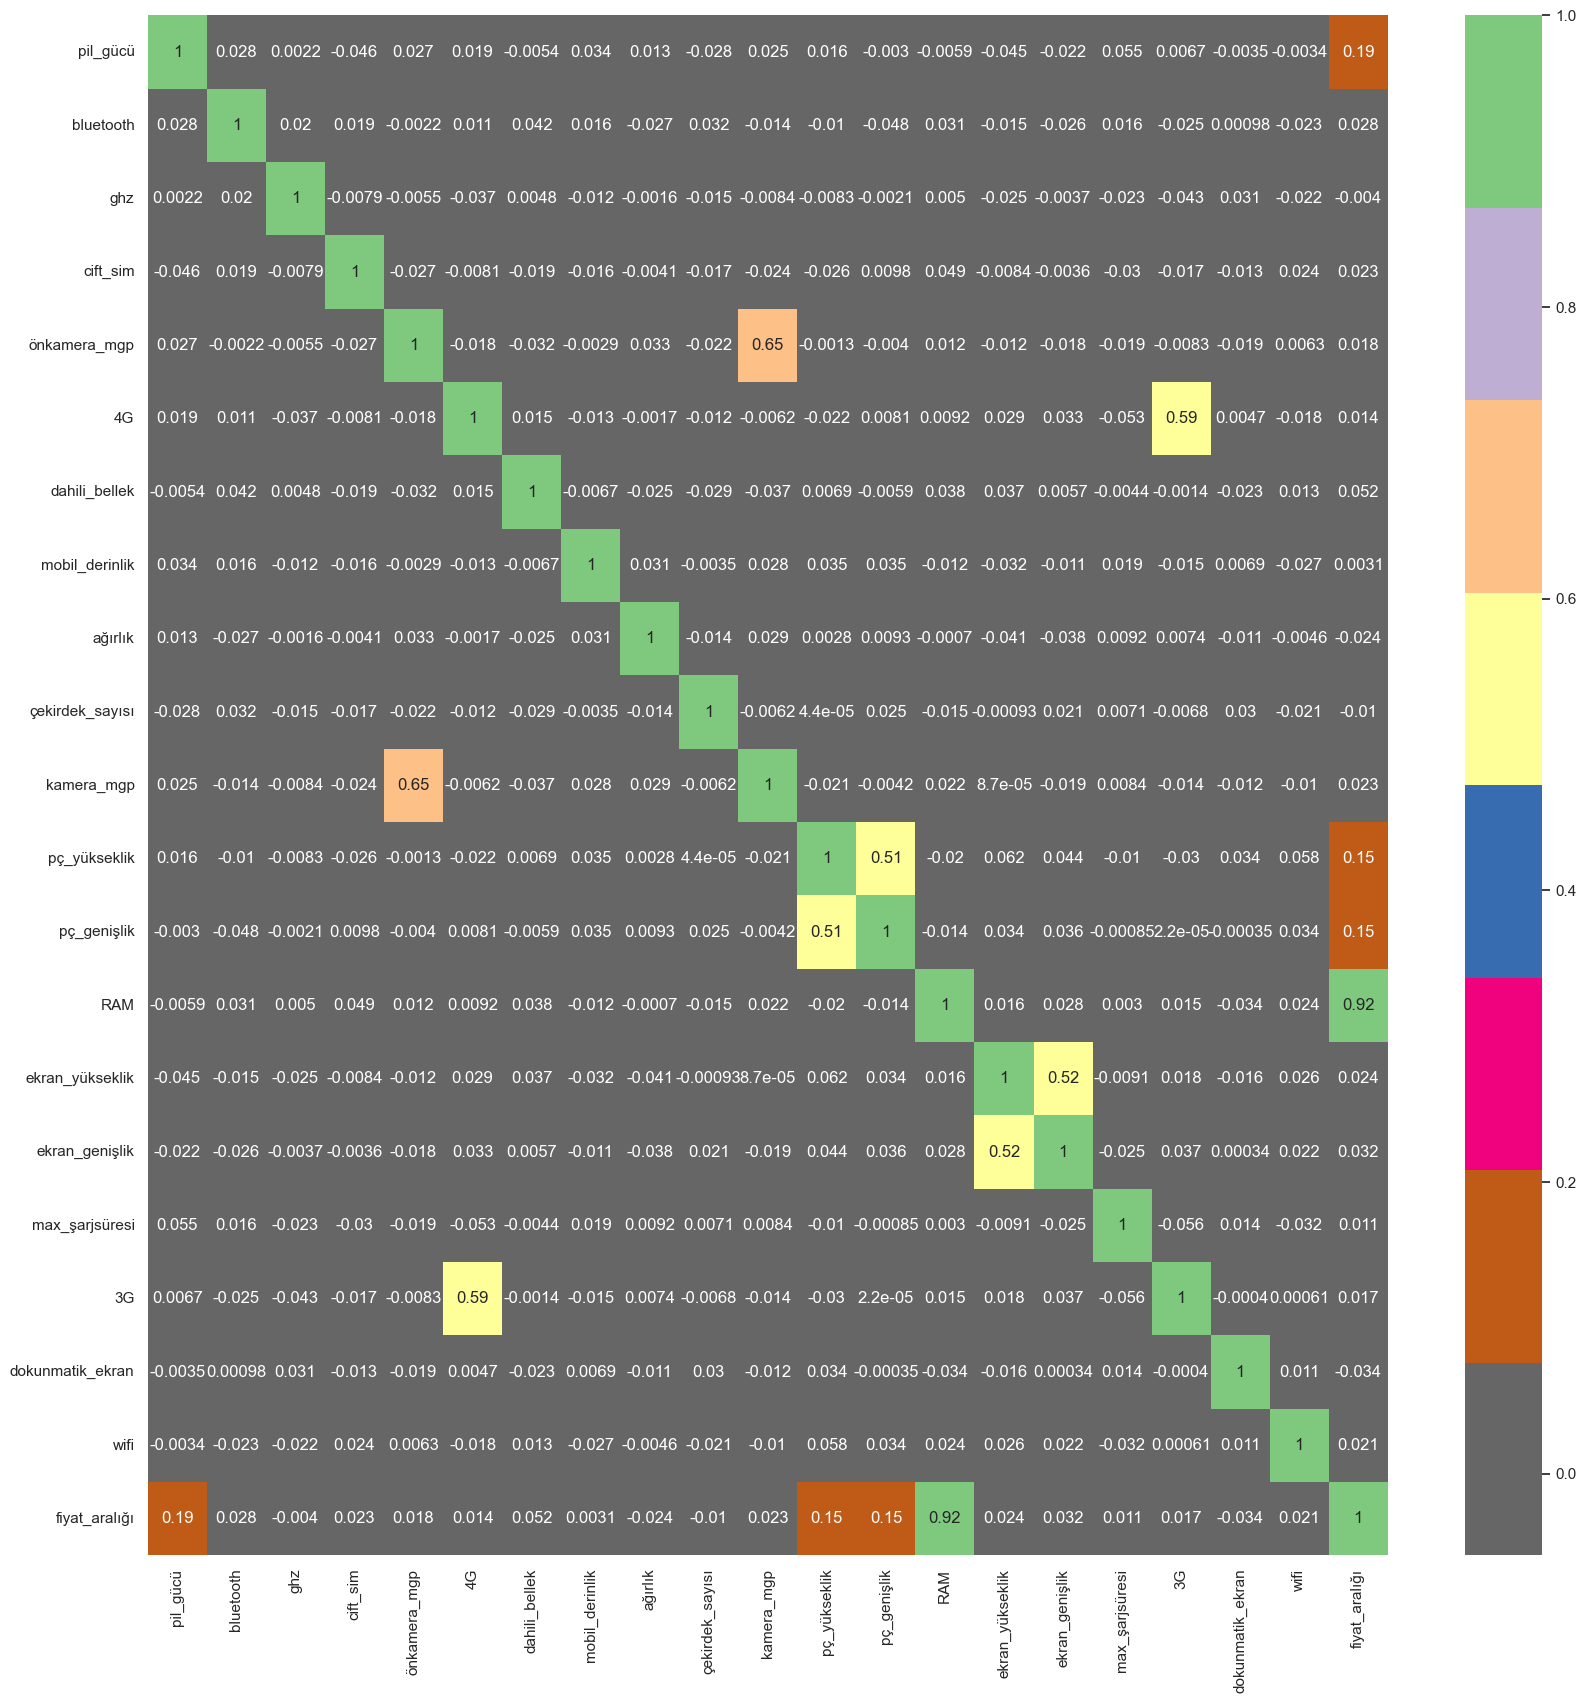

In [153]:
plt.figure(figsize=(20,20))
sbn.heatmap(data.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

# <font color='red'> Temel Veri Keşfi Sonuçları

In [154]:
data.nunique()

pil_gücü            1052
bluetooth              2
ghz                   26
cift_sim               2
önkamera_mgp          20
4G                     2
dahili_bellek         63
mobil_derinlik        10
ağırlık              121
çekirdek_sayısı        8
kamera_mgp            21
pç_yükseklik        1071
pç_genişlik         1056
RAM                 1455
ekran_yükseklik       15
ekran_genişlik        18
max_şarjsüresi        19
3G                     2
dokunmatik_ekran       2
wifi                   2
fiyat_aralığı          4
dtype: int64

**Her sütun için benzersiz değerler:** 
    
**-Hangi kolonun kategorik hangisinin Sürekli olduğunu anlamak için;** 
**Tipik olarak, benzersiz değerlerin sayısı < 20 ise değişken muhtemelen bir kategoriktir, aksi halde süreklidir.**


In [155]:
# Temel Veri Keşfi Sonuçları
# Bu adımda seçilen sütunlar nihai değildir, daha fazla çalışma yapılacak ve ardından nihai bir liste oluşturulacaktır

## fiyat_aralığı  => kategorik olarak seçildi. Bu, Hedef Değişkendir           
## bluetooth     => kategorik olarak seçildi.             
## cift_sim      => kategorik olarak Seçildi.
## 4G            => kategorikolarak Seçildi.    
## çekirdek_sayısı  => kategorik olarak Seçildi. 
## 3G             => kategorik olarak Seçildi       
## dokunmatik_ekran  => Kategorik olarak Seçildi      
## wifi            => Kategorik. Seçildi


## pil_gücü => sürekli olarak seçildi.

## ghz      => sürekli olarak seçildi.
## önkamera_mgp  => sürekli olarak seçildi.
## dahili_bellek  => sürekli olarak seçildi.
## mobil_derinlik  => sürekli olarak seçildi. 
## max_şarj_süresi => sürekli olarak seçildi.
## ekran_genişlik & ekran_yükseklik => sürekli olarak seçildi.
## pç_yükseklik & pç_genişlik => sürekli olarak seçildi*
## RAM => sürekli olarak seçildi
## kamera_mgp & ağırlık => sürekli olarak seçildi.
 


# <font color='red'>Görsel Keşfi Veri Analizi

**Kategorik değişkenler: Çubuk grafiği**
    
**Sürekli değişkenler: Histogram**

In [156]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
   # Birden fazla alt grafik oluşturma
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# <font color='red'>Kategorik değişkenlerin Çubuk grafiği

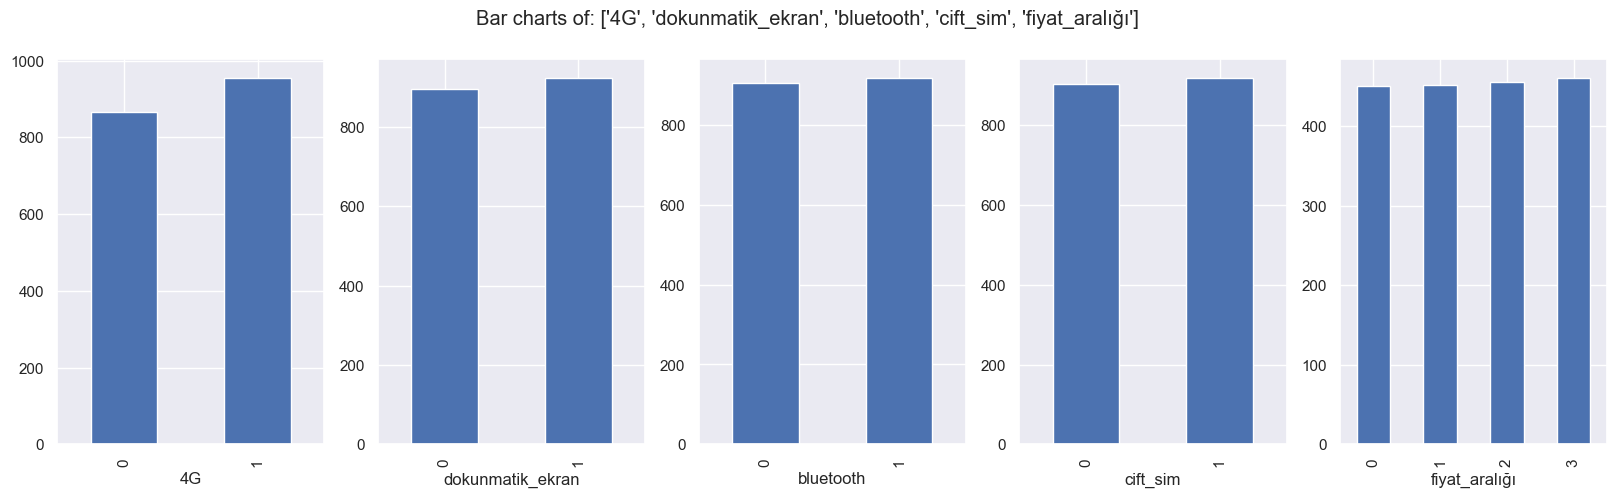

In [157]:
# Fonksiyon çağırma
PlotBarCharts(inpData=data, colsToPlot=['4G','dokunmatik_ekran','bluetooth', 'cift_sim','fiyat_aralığı' ] )

# <font color='lacivert'>Çubuk Grafiklerin Yorumlanması

In [158]:
# Bu çubuk grafikler, Y eksenindeki her bir kategorinin frekanslarını ve X eksenindeki kategori adlarını temsil eder.
# İdeal çubuk grafikte her kategori karşılaştırılabilir frekansa sahiptir. Bu nedenle, 
# ML algoritmasının öğrenmesi için verilerde her kategori için yeterli satır vardır.

# Yalnızca bir baskın çubuğun olduğu ve diğer kategorilerin çok düşük sayılarda olduğu, 
# çok çarpık dağılım gösteren bir sütun varsa. Bu tür sütunlar, makine öğreniminde çok yardımcı olmayabilir. 
# Bunu korelasyon analizi bölümünde onaylıyoruz ve sütunu seçmek veya reddetmek için son bir çağrı yapıyoruz.

# Seçilen Kategorik Değişkenler: Tüm kategorik değişkenler daha fazla analiz için seçilir.

# '4G', 'dokunmatik_ekran', 'Çekirdek_sayısı', 'bluetooth', 'çift_sim'

# <font color='red'>Sürekli Değişkenlerin Histogram Grafiği

**Histogramları kullanarak verilerdeki tüm Sürekli Tahmin değişkenlerinin dağılımını görselleştirdik.**

**-Temel Veri Keşfi'ne dayalı olarak, Üç sürekli tahmin değişkeni 'ram', 'ağırlık', 'max_şarjsüresü' ve 'pil_gücü'.**

array([[<AxesSubplot: title={'center': 'pil_gücü'}>,
        <AxesSubplot: title={'center': 'ghz'}>],
       [<AxesSubplot: title={'center': 'RAM'}>,
        <AxesSubplot: title={'center': 'ağırlık'}>],
       [<AxesSubplot: title={'center': 'max_şarjsüresi'}>,
        <AxesSubplot: >]], dtype=object)

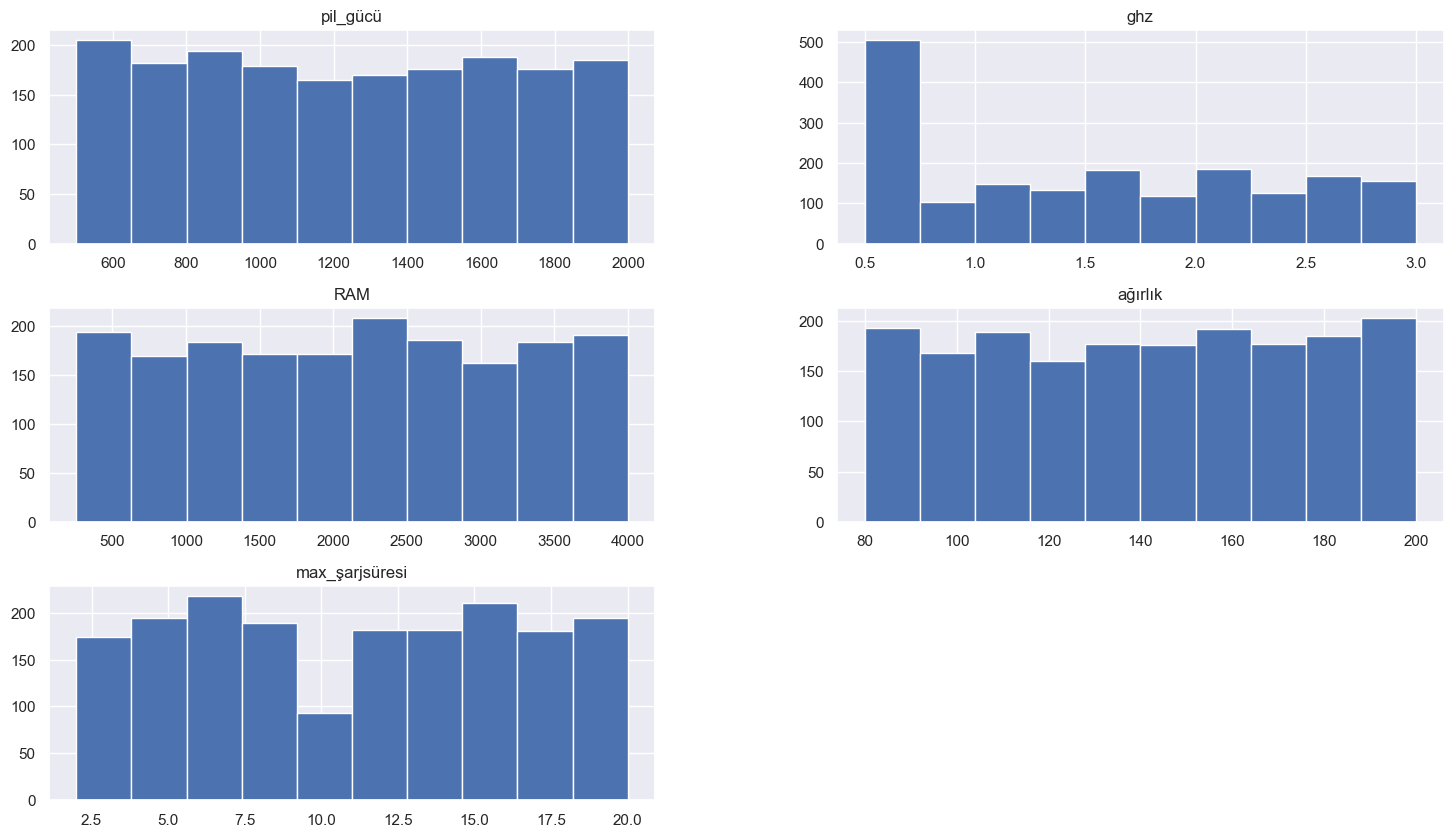

In [159]:
# Birden çok sütunun histogramlarını birlikte çizme

data.hist(['pil_gücü','ghz','RAM','ağırlık','max_şarjsüresi'], figsize=(18,10))


# <font color='lacivert'>Histogram Yorumu

In [160]:
# Histogramlar bize tek bir sürekli değişken için veri dağılımını gösterir.

# X ekseni, değer aralığını gösterir ve Y ekseni, bu aralıktaki değer sayısını temsil eder. 
# Örneğin, yukarıdaki "max_şarsüresi" histogramında, 7.5 ile 10 arasında bir değere sahip verilerde yaklaşık 200 satır vardır.

# Histogram için ideal sonuç, bir çan eğrisi veya hafif eğimli bir çan eğrisidir. Çok fazla çarpıklık varsa, 
# aykırı değer tedavisi yapılmalı ve sütun yeniden incelenmelidir, bu da sorunu çözmezse, o zaman yalnızca sütunu reddedin.

# Seçilen Sürekli Değişkenler:

# max_şarsüresi => Seçildi. Dağıtım iyi.
# ağırlık =>  Dağıtım iyi.
# ghz =>  Dağıtım iyi.
# pil_gücü =>  Dağıtım iyi.
# Ram => Dağıtımiyi 

# <font color='red'>Aykırı Değerler

In [161]:
# Aykırı değerler, verilerdeki değerlerin çoğundan uzakta olan uç değerlerdir. Bunları histogramda kuyruk olarak görebilirsiniz.

# Aykırı değer, her seferinde bir sütun olarak ele alınmalıdır. Tedavi her sütun için biraz farklı olacağından.

# Aykırı değerleri neden tedavi etmeliyim?

# Aykırı değerler, makine öğrenimi modellerinin eğitimini saptırır. Algoritma uç değeri sığdırmaya çalışırken, verilerin çoğundan uzaklaşır.

# Verilerdeki aykırı değerleri işlemek için aşağıda iki seçenek vardır.

# Seçenek-1: Aykırı Kayıtları Sil. Yalnızca birkaç satır kaybolmuşsa.
# Seçenek-2: Aykırı değerlere mantıksal bir iş değeri ekleyin
# Bu verilerde belirgin bir aykırı değer yoktur, dolayısıyla bu bölümde aykırı değer ele alınmaz.

# <font color='red'>Öznitelik Seçimi


In [162]:
# Öznitelik Seçimi

# Şimdi, Hedef değişkenle ilişkilendirilen en iyi sütunları (Özellikler) seçmenin zamanı geldi. 

# Eğer sürekli değişkenlerinizi kullanacaksanız, öznitelik seçimi yöntemlerinden bazıları Correlation-based 
# Feature Selection (CBS) ve SelectKBest yöntemleri olabilir. CBS, öznitelikler arasındaki korelasyonu ölçer 
# ve düşük korelasyonlu öznitelikleri seçer. SelectKBest ise her öznitelik için belirli bir skor fonksiyonu kullanarak 
# skorları hesaplar ve en yüksek skorlu öznitelikleri seçer. 

# Eğer kategorik değişkenlerinizi kullanacaksanız, öznitelik 
# seçimi yöntemlerinden bazıları Wrapper Method ve Embedded Method yöntemleri olabilir. Wrapper Method, özniteliklerin 
# sınıflandırma performansını ölçen bir algoritma kullanarak öznitelikleri seçer. Embedded Method ise, öznitelikleri 
# sınıflandırma algoritmasının öğrenme sürecinde doğrudan değerlendirir. Örneğin, bir decision tree algoritması, 
# dallarının en yararlı öznitelikleri seçerken kullanılabilir.

# <font color='red'>Sürekli Değişkenler için Öznitelik Seçimi


In [189]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
 
surekli_Sutunlar = ['pil_gücü','ghz','RAM','ağırlık','max_şarjsüresi','önkamera_mgp','dahili_bellek',
                    'mobil_derinlik','ekran_genişlik','ekran_yükseklik','pç_yükseklik','pç_genişlik','kamera_mgp']

# Öznitelikleri ve hedef değişkeni seçin
X = data[surekli_Sutunlar]
y = data["fiyat_aralığı"]

# CBS için skor fonksiyonu olarak mutual_info_regression kullanılır
selector = SelectKBest(score_func=mutual_info_regression, k=5)

# Öznitelikleri seç
X_new = selector.fit_transform(X, y)

# Seçilen öznitelikleri görüntüle
selected_features = np.asarray(surekli_Sutunlar)[selector.get_support()]
print(selected_features)

['pil_gücü' 'RAM' 'max_şarjsüresi' 'önkamera_mgp' 'pç_genişlik']


# <font color='red'>Kategorik Değişkenler için RandomForestClassifier ile Öznitelik Seçimi


In [206]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


CategoricalPredictorList = ['4G','dokunmatik_ekran','bluetooth', 'cift_sim','3G','çekirdek_sayısı','wifi']


# Öznitelikleri ve hedef değişkeni seçin
X = data[CategoricalPredictorList]
y = data["fiyat_aralığı"]

# Wrapper Method için Decision Tree kullanarak öznitelik seçimi yap

randomForestModel = RandomForestClassifier(random_state=42)

selector = SelectFromModel(randomForestModel)
X_new = selector.fit_transform(X, y)

# Seçilen öznitelikleri görüntüle
selected_features = np.asarray(CategoricalPredictorList)[selector.get_support()]
print('Random Forest Model İle seçilen Öznitelikler',selected_features)
 

Random Forest Model İle seçilen Öznitelikler ['çekirdek_sayısı']


# <font color='red'>Kategorik Değişkenler için DecisionTreeClassifier ile Öznitelik Seçimi


In [205]:
from sklearn.tree import DecisionTreeClassifier

CategoricalPredictorList=['4G','dokunmatik_ekran','bluetooth', 'cift_sim','3G','çekirdek_sayısı','wifi']

# Öznitelikleri ve hedef değişkeni seçin
X = data[CategoricalPredictorList]
y = data["fiyat_aralığı"]

# Wrapper Method için Decision Tree kullanarak öznitelik seçimi yap

clf = DecisionTreeClassifier(random_state=42)

selector = SelectFromModel(clf)
X_new = selector.fit_transform(X, y)

# Seçilen öznitelikleri görüntüle
selected_features = np.asarray(CategoricalPredictorList)[selector.get_support()]
print('Decision Tree Model İle seçilen Öznitelikler',selected_features)

Decision Tree Classifier Model İle seçilen Öznitelikler ['bluetooth' '3G' 'çekirdek_sayısı' 'wifi']


# <font color='red'>Makine Öğrenimi için son tahmin edicileri seçme


In [208]:
#  ******** Makine Öğrenimi için son tahmin edicileri seçme*****

#  Yukarıdaki testlere göre, makine öğrenimi için son sütunların seçilmesi


SelectedColumns = ['pil_gücü','RAM','max_şarjsüresi','önkamera_mgp','pç_genişlik','bluetooth','3G','çekirdek_sayısı','wifi','fiyat_aralığı']

# Son sütunları seçme
data=data[SelectedColumns]
data.head()

,pil_gücü,RAM,max_şarjsüresi,önkamera_mgp,pç_genişlik,bluetooth,3G,çekirdek_sayısı,wifi,fiyat_aralığı
0,842,2549,19,1,756,0,0,2,1,1
1,1021,2631,7,0,1988,1,1,3,0,2
2,563,2603,9,2,1716,1,1,5,0,2
3,615,2769,11,0,1786,1,1,6,0,2
4,1821,1411,15,13,1212,1,1,2,0,1


In [209]:
# Dağıtım sırasında referans olması için bu son verileri kaydetme
data.to_pickle('data.pkl')

# <font color='red'> veri setinin bağımlı ve bağımsız değişkenlere ayrılması.

In [210]:
X = data.drop('fiyat_aralığı',axis=1)
y = data['fiyat_aralığı']

# <font color='red'>veri setinin eğitim ve teste bölünmesi:

**train_test_split yöntemini kullanarak modeli değerlendirmek için veri setini eğitim ve teste böldük.**

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

# <font color='red'>Normalizasyon:

**normalizasyon eğitim ve test veri kümelerine uyguladık.normalizasyon, tüm özelliklerin değerini belirli bir aralıkta (0-1) yapar.**

In [212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [213]:
X_train

array([[-1.4583795 , -0.41268939, -0.73713497, ...,  0.55337157,
         1.07675529, -1.02597835],
       [-1.59011287, -1.28682761,  1.27098385, ...,  0.55337157,
        -1.54523455, -1.02597835],
       [ 0.05882548, -1.64676687,  0.54075882, ...,  0.55337157,
        -0.23423963,  0.97467943],
       ...,
       [-0.23871022, -1.56963703, -0.1894662 , ...,  0.55337157,
        -1.54523455,  0.97467943],
       [ 1.48745114,  0.2300593 ,  0.72331508, ...,  0.55337157,
        -0.23423963,  0.97467943],
       [ 0.88556593, -1.35110247, -0.55457871, ...,  0.55337157,
         1.5137536 , -1.02597835]])

In [214]:
X_test

array([[-0.62709653,  0.85536195, -0.55457871, ...,  0.55337157,
         0.20275868,  0.97467943],
       [-0.89283453,  0.37421864,  1.4535401 , ..., -1.80710404,
        -1.10823624,  0.97467943],
       [ 0.83332683, -0.25659328, -1.64991625, ...,  0.55337157,
        -1.54523455,  0.97467943],
       ...,
       [ 0.30185083,  0.73415791,  1.08842759, ..., -1.80710404,
         1.07675529, -1.02597835],
       [-1.30847602, -0.08947862, -1.64991625, ...,  0.55337157,
        -0.67123794,  0.97467943],
       [-1.60601172,  1.02339482, -0.91969122, ...,  0.55337157,
        -1.10823624, -1.02597835]])

# <font color='blue'> MODELİN OLUŞTURLUMASI VE EĞİTİLMESİ

# Cross Validation

In [215]:
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold, train_test_split, cross_val_predict,cross_val_score
from sklearn import metrics

def crossValidationFunction(model):
    k = 5
    k_folds = KFold(n_splits = k, random_state = 49, shuffle = True)
    scores = cross_val_score(model, X, y, cv = k_folds)
    for i in scores:
        print("Cross Validation Skoru:", i)
    return print("\033[95m\x1B[1m\nOrt CV Skoru: ", scores.mean())


In [216]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sbn.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# 1) Decision Trees Classifier(karar ağaçları)

**DecisionTreeClassifier'ı tanımlayıp ve X_train ve Y_train veri kümesiyle eğittik. Ardından, X_test veri setini kullanarak modeli test ettik. Ardından, Karar Ağacı Sınıflandırıcısının doğruluk puanını kontrol ettik.**



 Decision Trees Sınıflandırıcı Doğruluk Puanı:  0.8131868131868132



              precision    recall  f1-score   support

           0       0.96      0.86      0.91        50
           1       0.73      0.83      0.78        42
           2       0.74      0.72      0.73        47
           3       0.84      0.84      0.84        43

    accuracy                           0.81       182
   macro avg       0.82      0.81      0.81       182
weighted avg       0.82      0.81      0.81       182



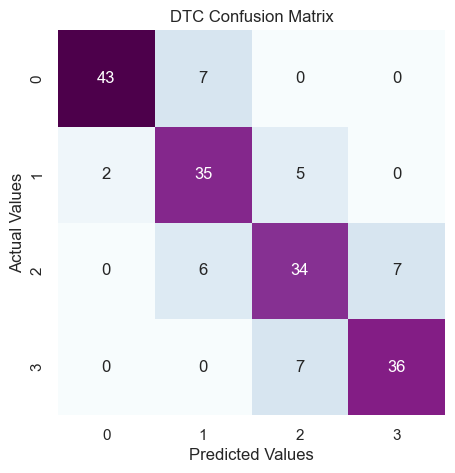

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_percentage_error

dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)

y_pred_Dtc=dtc.predict(X_test)

print('\033[95m\x1B[1m Decision Trees Sınıflandırıcı Doğruluk Puanı: ',accuracy_score(y_test,y_pred_Dtc))
print('\n\n')
cm_rfc=my_confusion_matrix(y_test,y_pred_Dtc , 'DTC Confusion Matrix')


**Decision Trees Clasifier(karar ağaçları sınıflandırıcı) cross validation**

In [121]:
crossValidationFunction(dtc)

Cross Validation Skoru: 0.804945054945055
Cross Validation Skoru: 0.8763736263736264
Cross Validation Skoru: 0.8379120879120879
Cross Validation Skoru: 0.8461538461538461
Cross Validation Skoru: 0.8296703296703297

Ort CV Skoru:  0.839010989010989


**Decision Tress classifier (Karar ağaçları sınıflandırma) modelinin Yorumlanması**

**modelimizin başarısı 0.845 iken cross validation uyguladığımızda eğitim modelimizin başarısı 0.837 oranına düştü.**

# 2) SVM Classifier (Support Vector Machine)

 SSWM sınıflandırıcı Doğruluk Skoru:  0.8846153846153846



              precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.80      0.88      0.84        42
           2       0.86      0.81      0.84        47
           3       0.93      0.91      0.92        43

    accuracy                           0.88       182
   macro avg       0.88      0.88      0.88       182
weighted avg       0.89      0.88      0.88       182



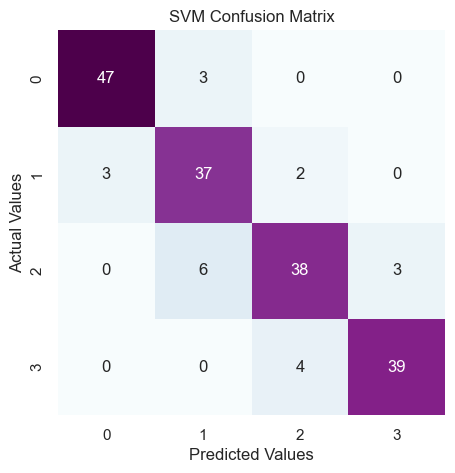

In [218]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svm_clf = svm.SVC(decision_function_shape='ovo')

svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_test)

print('\033[95m\x1B[1m SSWM sınıflandırıcı Doğruluk Skoru: ',accuracy_score(y_test,y_pred_svm))
print('\n\n')
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

**SWM Clasifier(Destek vektör makineleri sınıflandırıcı) cross validation**

In [219]:
crossValidationFunction(svm_clf)

Cross Validation Skoru: 0.8626373626373627
Cross Validation Skoru: 0.9120879120879121
Cross Validation Skoru: 0.9203296703296703
Cross Validation Skoru: 0.8873626373626373
Cross Validation Skoru: 0.8873626373626373

Ort CV Skoru:  0.8939560439560438


**SWM (support vector machine sınıflandırıcı) Clasifier Modelinin Yorumlanması**

**modelimizin başarısı 0.88 iken cross validation uygulandı modelin başarısı 0.94 oranına yükseldi..**

# 3) Gaussian Naive Bayes Clasifier

 Gauss NB Sınıflandırıcı Doğruluk Puanı:  0.7912087912087912



              precision    recall  f1-score   support

           0       0.90      0.92      0.91        50
           1       0.67      0.71      0.69        42
           2       0.70      0.68      0.69        47
           3       0.90      0.84      0.87        43

    accuracy                           0.79       182
   macro avg       0.79      0.79      0.79       182
weighted avg       0.79      0.79      0.79       182



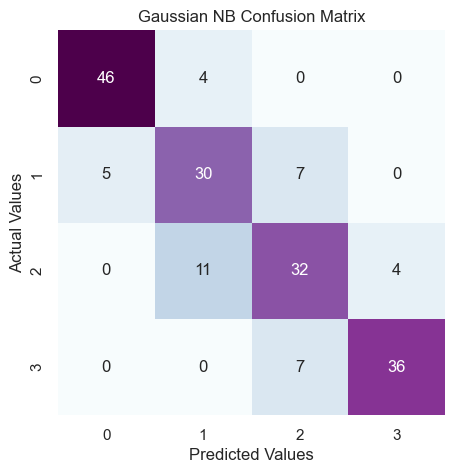

In [124]:
from sklearn.naive_bayes import GaussianNB

NaviBModelGaus = GaussianNB()

NaviBModelGaus.fit(X_train, y_train)
y_pred_NaviBModel=NaviBModelGaus.predict(X_test)

print('\033[95m\x1B[1m Gauss NB Sınıflandırıcı Doğruluk Puanı: ',accuracy_score(y_test,y_pred_NaviBModel))
print('\n\n')
cm_rfc=my_confusion_matrix(y_test, y_pred_NaviBModel, 'Gaussian NB Confusion Matrix')

**Naive Bayes Clasifier cross validation**

In [125]:
crossValidationFunction(NaviBModelGaus)

Cross Validation Skoru: 0.7802197802197802
Cross Validation Skoru: 0.8571428571428571
Cross Validation Skoru: 0.804945054945055
Cross Validation Skoru: 0.7884615384615384
Cross Validation Skoru: 0.7774725274725275

Ort CV Skoru:  0.8016483516483517


**Naive Bayes Clasifier Modelinin Yorumlanması**

**modelimizin başarısı 0.82 iken cross validation uygulandı modelin başarısı 0.80 oranına düştü.**

# # 3) Multinomial  Naive Bayes Clasifier

 Gauss NB Sınıflandırıcı Doğruluk Puanı:  0.25824175824175827



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.29      0.33      0.31        42
           2       0.18      0.15      0.16        47
           3       0.54      0.60      0.57        43

    accuracy                           0.26       182
   macro avg       0.25      0.27      0.26       182
weighted avg       0.24      0.26      0.25       182



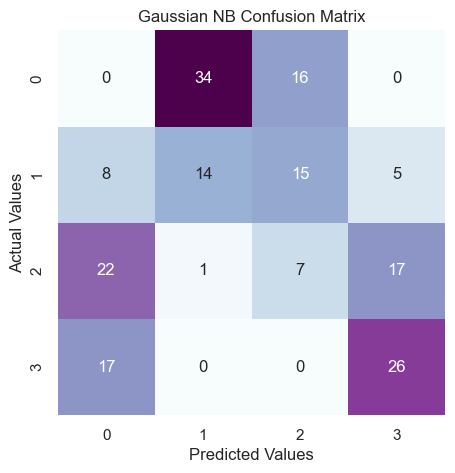

In [126]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

NaviBModelMulti = MultinomialNB()

NaviBModelMulti.fit(np.abs(X_train), y_train)
y_pred_NaviBModel=NaviBModelMulti.predict(X_test)

print('\033[95m\x1B[1m Gauss NB Sınıflandırıcı Doğruluk Puanı: ',accuracy_score(y_test,y_pred_NaviBModel))
print('\n\n')
cm_rfc=my_confusion_matrix(y_test, y_pred_NaviBModel, 'Gaussian NB Confusion Matrix')

In [127]:
crossValidationFunction(NaviBModelMulti)

Cross Validation Skoru: 0.489010989010989
Cross Validation Skoru: 0.554945054945055
Cross Validation Skoru: 0.5439560439560439
Cross Validation Skoru: 0.521978021978022
Cross Validation Skoru: 0.49725274725274726

Ort CV Skoru:  0.5214285714285715


# 4) KNN Classifier (en yakın komşu sınıflandırıcı) 

 KNN Sınıflandırıcı Doğruluk Puanı:  0.5164835164835165



              precision    recall  f1-score   support

           0       0.64      0.76      0.70        50
           1       0.36      0.45      0.40        42
           2       0.39      0.34      0.36        47
           3       0.72      0.49      0.58        43

    accuracy                           0.52       182
   macro avg       0.53      0.51      0.51       182
weighted avg       0.53      0.52      0.52       182



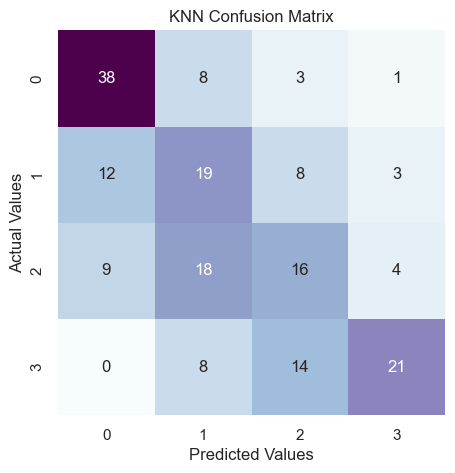

In [128]:
from sklearn.neighbors import KNeighborsClassifier
kNNModel = KNeighborsClassifier()

kNNModel.fit(X_train, y_train)
y_pred_knn=kNNModel.predict(X_test)

print('\033[95m\x1B[1m KNN Sınıflandırıcı Doğruluk Puanı: ',accuracy_score(y_test,y_pred_knn))
print('\n\n')
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

**KNN Clasifier(en yakın komşu sınıflandırıcı) cross validation**

In [129]:
crossValidationFunction(kNNModel)

Cross Validation Skoru: 0.9010989010989011
Cross Validation Skoru: 0.9313186813186813
Cross Validation Skoru: 0.9313186813186813
Cross Validation Skoru: 0.9203296703296703
Cross Validation Skoru: 0.9093406593406593

Ort CV Skoru:  0.9186813186813186


**KNN (en yakın komşu sınıflandırıcı) Clasifier Modelinin Yorumlanması**

**modelimizin başarısı 0.48 iken cross validation uygulandı modelin başarısı 0.92 oranına yükseldi.**

# 4) Yapay Sinir Ağı Modeli


 Yapay Sinir Ağı Modeli Sınıflandırıcı Doğruluk Puanı:  0.5164835164835165



              precision    recall  f1-score   support

           0       0.64      0.76      0.70        50
           1       0.36      0.45      0.40        42
           2       0.39      0.34      0.36        47
           3       0.72      0.49      0.58        43

    accuracy                           0.52       182
   macro avg       0.53      0.51      0.51       182
weighted avg       0.53      0.52      0.52       182



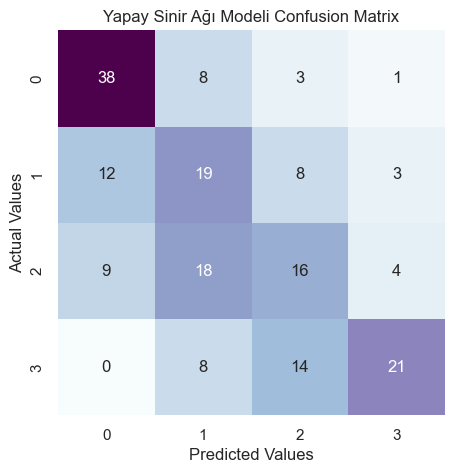

In [132]:
from sklearn.neural_network import MLPClassifier

# yapay sinir ağı modeli oluşturun
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# modeli eğitin
mlp.fit(X_train, y_train)

print('\033[95m\x1B[1m Yapay Sinir Ağı Modeli Sınıflandırıcı Doğruluk Puanı: ',accuracy_score(y_test,y_pred_knn))
print('\n\n')
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'Yapay Sinir Ağı Modeli Confusion Matrix')

In [130]:
crossValidationFunction(mlp)

Cross Validation Skoru: 0.49175824175824173
Cross Validation Skoru: 0.6071428571428571
Cross Validation Skoru: 0.6318681318681318
Cross Validation Skoru: 0.6813186813186813
Cross Validation Skoru: 0.6318681318681318

Ort CV Skoru:  0.6087912087912087


# 5) Random Forest clasifier (Rastgele Orman Sınıflandırıcısı)

Tanımlandığımız fonksiyona göre, sınıflandırma algoritmalarını uyguladık.

Rastgele orman, karar ağacı tekniklerinden oluşturulan denetimli bir makine öğrenimi yöntemidir.

Rastgele orman, regresyon ve sınıflandırma sorunlarını çözmek için bir makine öğrenimi yaklaşımıdır.

Rastgele bir orman yöntemi, çok sayıda karar ağacından oluşur. Rastgele orman algoritmasının 'ormanı', torbalama veya önyükleme toplama yoluyla eğitilir. Torbalama, makine öğrenimi algoritmalarının doğruluğunu artıran bir meta algoritma topluluğudur

In [111]:
from sklearn.ensemble import RandomForestClassifier
RadForModel=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [113]:
RadForModel.fit(X_train, y_train)
y_pred_RadForModel=RadForModel.predict(X_test)

 Rastgele Orman Sınıflandırıcı Doğruluk Skoru: 0.8846153846153846
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.83      0.90      0.86        42
           2       0.81      0.81      0.81        47
           3       0.93      0.86      0.89        43

    accuracy                           0.88       182
   macro avg       0.88      0.88      0.88       182
weighted avg       0.89      0.88      0.89       182



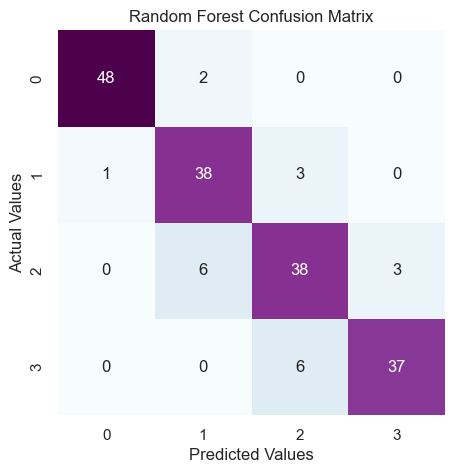

In [115]:
print('\033[95m\x1B[1m Rastgele Orman Sınıflandırıcı Doğruluk Skoru:' ,accuracy_score(y_test,y_pred_RadForModel))
cm_RadForModel=my_confusion_matrix(y_test, y_pred_RadForModel, 'Random Forest Confusion Matrix')

**Random Forest Sınaflandıırıcı İçin Cross Validation**

In [367]:
crossValidationFunction(RadForModel)

Cross Validation Skoru: 0.8575
Cross Validation Skoru: 0.8925
Cross Validation Skoru: 0.895
Cross Validation Skoru: 0.9175
Cross Validation Skoru: 0.8775

Ort CV Skoru:  0.8879999999999999


**RandomForestClasifier Modelinin Yorumlanması**

**modelimizin başarısı 0.90 iken cross validation uygulandı modelin başarısı 0.88 oranına düştü.**

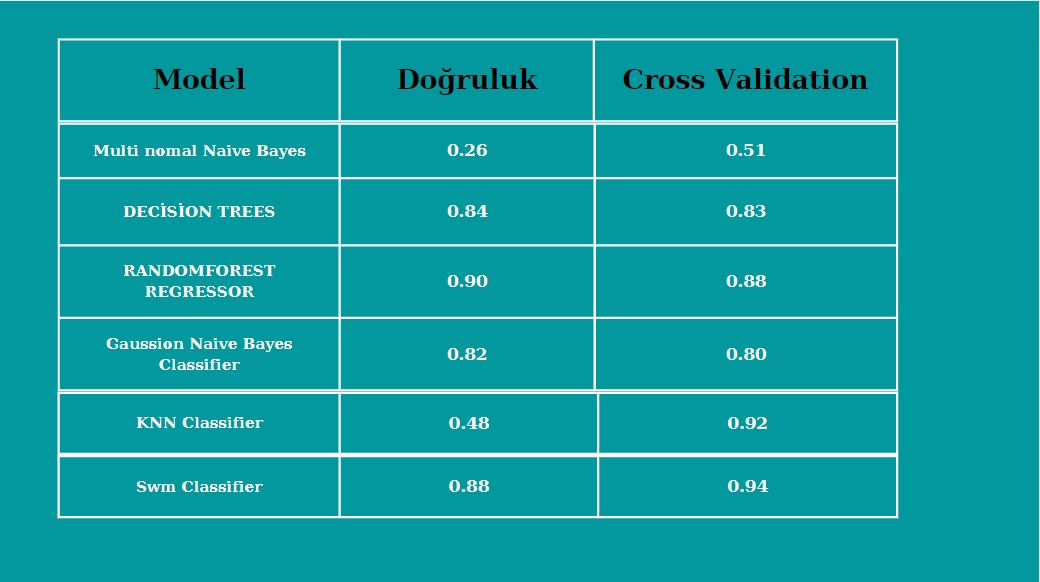